In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from google.colab.patches import cv2_imshow

**TASK 1**

---

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/ADA_HW2.mp4')
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
duration_seconds = frame_count / frame_rate
print("Frame Count:", frame_count)
print("Frame Width:", frame_width)
print("Frame Height:", frame_height)
print("Frame Rate:", frame_rate)
print("Duration (seconds):", duration_seconds)

Frame Count: 91
Frame Width: 1280
Frame Height: 720
Frame Rate: 30
Duration (seconds): 3.033333333333333


In [ ]:
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop when you reach the end of the video
    frames.append(frame)
cap.release() # Release the video capture object
combined_image = np.concatenate(frames, axis=1)
# cv2_imshow(combined_image) # it doesnt show the frames as an array

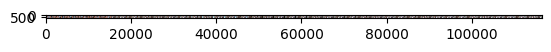

In [ ]:
plt.imshow(combined_image) # this is the entire array of all the frames from the combined image

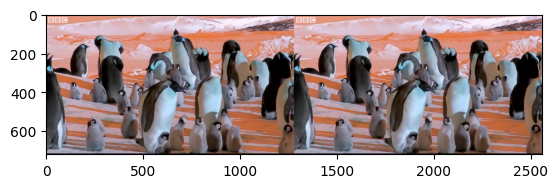

In [ ]:
plt.imshow(combined_image[:, :1280*2]) # displaying 2 of the frames

In [ ]:
# Part 1
# finding the mean and std along the row
mean_image = np.mean(combined_image, axis=1)
print("Mean each row \n")
print(mean_image)
std_image = np.std(combined_image, axis=1)
print("\nSTD each row \n")
print(std_image)

mean_image_all = np.mean(combined_image)
print("\n\nMean for the combined image: ")
print(mean_image_all)
std_image_all = np.std(combined_image)
print("\nSTD for the combined image: ")
print(std_image_all)

Mean each row 

[[1.88945167e+02 1.42249923e+02 1.11099751e+02]
 [1.88792170e+02 1.42096909e+02 1.10946729e+02]
 [1.88483001e+02 1.41864526e+02 1.10938771e+02]
 ...
 [5.46790608e+01 4.81280306e+01 4.96341690e+01]
 [1.11469780e-01 2.87199519e+00 3.95089286e-02]
 [7.02622768e+00 1.38332589e+01 7.14541552e+00]]

STD each row 

[[73.55196432 48.8574019  41.95055796]
 [73.64511708 48.97554388 42.03105439]
 [73.56161778 49.15228916 42.2909152 ]
 ...
 [19.33117636 21.73565265 26.44106603]
 [ 0.53464033  1.29634368  0.28214038]
 [ 2.2690223   1.29372546  1.54593403]]


Mean for the combined image: 
111.63821585966117

STD for the combined image: 
63.47476093901339


In [ ]:
# grayscale is used to simplify the data so we change image from RGB to a single channel
gray_image = cv2.cvtColor(combined_image, cv2.COLOR_BGR2GRAY)
covariance_matrix = np.cov(gray_image)
print(covariance_matrix)

[[ 2.29115431e+03  2.29475591e+03  2.29916563e+03 ... -3.04626695e+02
  -2.33059034e+00 -1.54746984e+00]
 [ 2.29475591e+03  2.30154758e+03  2.30838615e+03 ... -3.07083710e+02
  -2.32992738e+00 -1.51017142e+00]
 [ 2.29916563e+03  2.30838615e+03  2.31927862e+03 ... -3.11118743e+02
  -2.32203561e+00 -1.46194114e+00]
 ...
 [-3.04626695e+02 -3.07083710e+02 -3.11118743e+02 ...  5.11859422e+02
   5.23556826e-01 -1.09009884e+00]
 [-2.33059034e+00 -2.32992738e+00 -2.32203561e+00 ...  5.23556826e-01
   6.19158789e-01  1.56131741e-01]
 [-1.54746984e+00 -1.51017142e+00 -1.46194114e+00 ... -1.09009884e+00
   1.56131741e-01  7.92852468e-01]]


In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
# sortING the eigenvalues and their corresponding eigenvectors in descending order
index=np.flip(eigen_values.argsort())
eigen_values=eigen_values[index]
eigen_vectors=eigen_vectors[:, index]
print("\n\nEigen Values of the resultant image:\n" ,eigen_values)
print("\nEigen Vectors of the resultant image:\n" ,eigen_vectors)



Eigen Values of the resultant image:
 [7.13100921e+05 3.97348035e+05 2.65279724e+05 2.57466431e+05
 1.51061742e+05 1.13373720e+05 8.08528789e+04 6.89002222e+04
 5.59225069e+04 3.80074258e+04 3.46536992e+04 3.01471162e+04
 2.58984872e+04 2.24255542e+04 2.20643456e+04 1.73607071e+04
 1.66415360e+04 1.30752651e+04 1.14558913e+04 1.01771151e+04
 9.55483042e+03 9.04042102e+03 8.78508929e+03 7.69437048e+03
 7.07070620e+03 6.02181398e+03 5.94404271e+03 5.01815442e+03
 4.75152895e+03 4.38672385e+03 4.07661353e+03 3.58747143e+03
 3.26375873e+03 3.07275227e+03 2.78912202e+03 2.53237820e+03
 2.37338055e+03 2.05901973e+03 2.03538830e+03 1.86657114e+03
 1.80050198e+03 1.73333386e+03 1.62427696e+03 1.48714076e+03
 1.42125467e+03 1.28888664e+03 1.24836387e+03 1.16702804e+03
 1.12240377e+03 1.05507619e+03 9.94758608e+02 9.56762111e+02
 9.37011549e+02 9.10493911e+02 8.84414103e+02 7.86150802e+02
 7.70785863e+02 7.48980369e+02 7.32401420e+02 6.81233943e+02
 6.47132635e+02 6.17260972e+02 5.94858698e+02

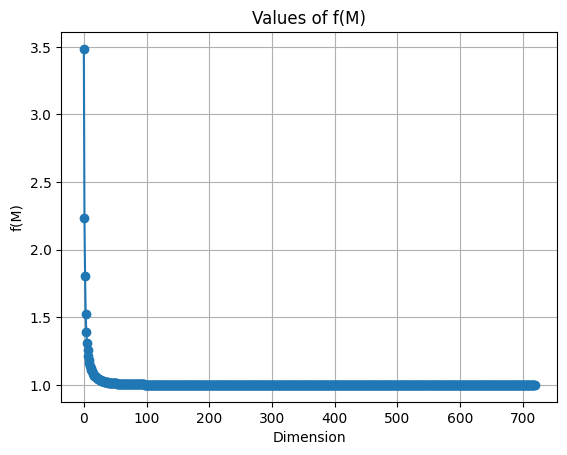

In [ ]:
numerator = np.sum(eigen_values)
denominator = np.cumsum(eigen_values)
f_values = numerator/denominator
plt.plot(f_values, marker='o', linestyle='-')
plt.title('Values of f(M)')
plt.xlabel('Dimension')
plt.ylabel('f(M)')
plt.grid(True)
plt.show()

**TASK 2**

---


Optimal 'r' 0.95 is 22


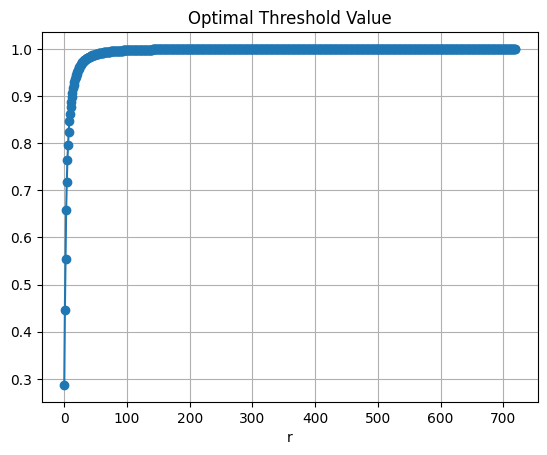

In [ ]:
cumulative_variance = np.cumsum(eigen_values) / np.sum(eigen_values)

threshold = 0.95 # you can set this

# position in the array where the cumulative variance meets or exceeds the specified threshold
optimal_r = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal 'r' {threshold} is {optimal_r}")

plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.title('Optimal Threshold Value')
plt.xlabel('r')
plt.grid(True)
plt.show()


In [ ]:
Vr = eigen_vectors[:, :optimal_r]
print(Vr)

[[-2.39262207e-02  6.98633765e-03  2.87597531e-02 ...  2.92730962e-02
   6.30074126e-02 -2.03562895e-03]
 [-2.39014945e-02  7.40495566e-03  2.96849383e-02 ...  2.85808744e-02
   6.21744952e-02 -2.99635436e-03]
 [-2.39252205e-02  7.88403282e-03  3.06831452e-02 ...  2.82320753e-02
   6.11605068e-02 -4.76006686e-03]
 ...
 [ 9.15274794e-03 -9.78012842e-03  1.28464627e-02 ...  3.59247927e-02
   3.47979783e-03  2.94050823e-02]
 [ 3.34675282e-05 -3.36882780e-06 -2.68507456e-05 ...  5.92696163e-05
   2.56045939e-04 -3.97863163e-04]
 [-4.30365084e-05  1.12299998e-04 -1.01861020e-04 ... -1.86978501e-04
   3.27620430e-05  3.66747570e-05]]


In [ ]:
# 𝑋̌ = 𝜇 + 𝑉𝑟𝑉𝑟́ (𝑋 − 𝜇)

centering = (gray_image - mean_image[:,0].reshape(-1, 1)) # reshaping mean to make the sizes align with the gray image
projected_data = np.dot(Vr, np.dot(Vr.T, centering))
resultant_image = mean_image[:,0].reshape(-1, 1) + projected_data
resultant_image = cv2.convertScaleAbs(resultant_image)
resultant_image = cv2.cvtColor(resultant_image, cv2.COLOR_BGR2RGB) # converting the resultant image back into RGB image
print(resultant_image.shape)

(720, 116480, 3)


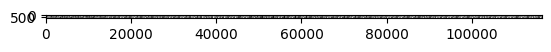

In [ ]:
plt.imshow(resultant_image) # this is the entire array of all the frames from the resultant image

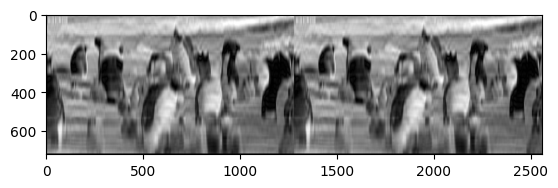

In [ ]:
plt.imshow(resultant_image[:, :1280*2]) # displaying 2 of the frames